> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + c_1 -c_0 u + c_3u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + c_2 -c_3 u^2 v$</center></h3>

With parameters  :
- $D_u = 1, \quad D_v=40$.
- $c_0 = 1$.
- $c_1 = 0.1$.
- $c_2 = 0.9$.
- $c_3 = 1$

In [1]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import Koch_Meinhardt

from matplotlib import pyplot as plt

In [3]:
import os
data_path = os.path.abspath("../turing.npy")
with open(data_path, 'rb') as f:
    data = np.load(f)
    
data_path = os.path.abspath("../turing_t.npy")
with open(data_path, 'rb') as f:
    t_star = np.load(f) 

In [6]:
n = (32, 32)
L = (50.0, 50.0)

#c0 = np.random.normal(scale=.5, size=(2, n[0], n[1]))
#c0[0, :,:] += 1.2
#c0[1, :,:] += 1.0
c0 = data[:, :, :, 0]

Ds = np.array([0.005, 0.2])
sigma_u, sigma_v = 0.0, 0.02
rho_u, rho_v = 0.01, 0.02
kappa_u, mu_u = 0.25, 0.01


f_args = (sigma_u, sigma_v, rho_u, rho_v, kappa_u, mu_u)
t = np.linspace(0, 50000, 256)

dt = 0.01

sol = integrate(c0, t, dt, n, L, Ds, Koch_Meinhardt, f_args)

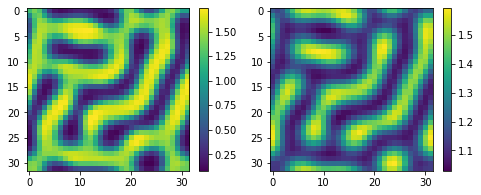

In [21]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()